In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [22]:
df = pd.read_csv('/Users/priya/Downloads/train_sample_10million.csv', delimiter = ',', header = 0)

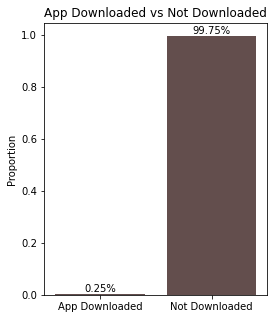

In [23]:
plt.figure(figsize=(4,5))
#sns.set(font_scale=1.2)
mean = (df.is_attributed.values == 1).mean()
ax = sns.barplot(['App Downloaded', 'Not Downloaded'], [mean, 1-mean], color = '#674b49')
ax.set(ylabel='Proportion', title='App Downloaded vs Not Downloaded')
for p, uniq in zip(ax.patches, [mean, 1-mean]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.01,
            '{}%'.format(round(uniq * 100, 2)),
            ha="center")

Ho: rate of fraud at night = rate of fraud during the day


Ha: rate of fraud at night ≠ rate of fraud during the day

In [3]:
df = df.loc[df['is_attributed']== 0]

In [4]:
df = df.drop(columns=['attributed_time','ip','app','device','os','channel'])

In [5]:
df['click_time'] = pd.to_datetime(df['click_time'])
df['click_hour']=df['click_time'].dt.hour

In [6]:
df['time_of_click'] = df['click_time'].dt.strftime('%H:%M')

In [7]:
df.head()

,click_time,is_attributed,click_hour,time_of_click
0,2017-11-08 23:43:41,0,23,23:43
1,2017-11-08 08:01:29,0,8,08:01
2,2017-11-09 09:49:42,0,9,09:49
3,2017-11-08 23:43:15,0,23,23:43
4,2017-11-09 11:15:49,0,11,11:15


In [8]:
mask = (pd.to_timedelta(df['time_of_click'].astype(str).add(':00'))
          .between(pd.Timedelta('06:00:00'), pd.Timedelta('18:00:00')))
day = df[mask]
print (day)

                 click_time  is_attributed  click_hour time_of_click
1       2017-11-08 08:01:29              0           8         08:01
2       2017-11-09 09:49:42              0           9         09:49
4       2017-11-09 11:15:49              0          11         11:15
6       2017-11-07 09:11:12              0           9         09:11
7       2017-11-09 13:58:04              0          13         13:58
...                     ...            ...         ...           ...
9999991 2017-11-07 14:30:26              0          14         14:30
9999995 2017-11-09 09:10:24              0           9         09:10
9999996 2017-11-07 08:17:49              0           8         08:17
9999997 2017-11-07 06:09:22              0           6         06:09
9999998 2017-11-09 14:50:14              0          14         14:50

[5769979 rows x 4 columns]


In [9]:
night = df[~mask]
print (night)

                 click_time  is_attributed  click_hour time_of_click
0       2017-11-08 23:43:41              0          23         23:43
3       2017-11-08 23:43:15              0          23         23:43
5       2017-11-08 00:42:24              0           0         00:42
8       2017-11-06 20:52:40              0          20         20:52
9       2017-11-07 01:51:51              0           1         01:51
...                     ...            ...         ...           ...
9999990 2017-11-08 03:29:43              0           3         03:29
9999992 2017-11-09 00:49:28              0           0         00:49
9999993 2017-11-07 02:43:47              0           2         02:43
9999994 2017-11-07 04:43:52              0           4         04:43
9999999 2017-11-07 22:38:28              0          22         22:38

[4205212 rows x 4 columns]


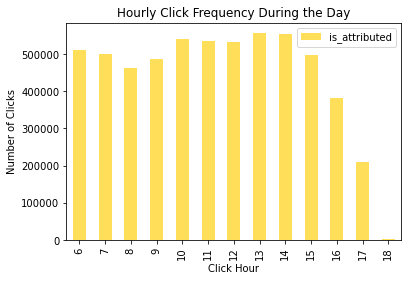

In [10]:
day[['click_hour','is_attributed']].groupby(['click_hour'], as_index=True).count().plot(kind='bar', color= '#ffde59')
plt.title('Hourly Click Frequency During the Day');
plt.ylabel('Number of Clicks');
plt.xlabel('Click Hour');
plt.savefig('d.png', bbox_inches='tight')

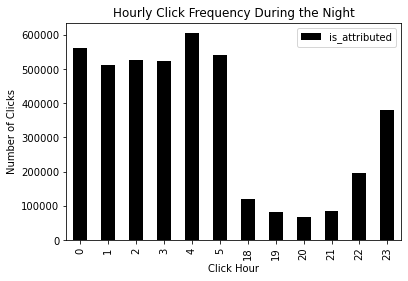

In [11]:
night[['click_hour','is_attributed']].groupby(['click_hour'], as_index=True).count().plot(kind='bar', color= 'black')
plt.title('Hourly Click Frequency During the Night');
plt.ylabel('Number of Clicks');
plt.xlabel('Click Hour');
plt.savefig('n.png', bbox_inches='tight')

In [12]:
n_click_count = night.groupby (['click_hour'])['is_attributed'].count()

In [13]:
d_click_count = day.groupby (['click_hour'])['is_attributed'].count()

Sample Mean of Night Time

In [14]:
n_click_count.sum()

4205212

In [15]:
n_click_count.shape

(12,)

In [16]:
n_click_count.mean()

350434.3333333333

In [17]:
n_click_count.std()

220021.9788270474

Sample Mean of Day Time

In [18]:
d_click_count.mean()

443844.53846153844

In [19]:
d_click_count.std()

161953.74058745673

In [20]:
np.std(d_click_count, ddof=1)


161953.74058745673

In [21]:
stats.ttest_ind(d_click_count, n_click_count, equal_var=False)


Ttest_indResult(statistic=1.2007528625973933, pvalue=0.24378158129037303)

The test gives a tstatistic of 1.2 and a pvalue of 0.24, so we FAIL TO REJECT the null hypothesis